410I Assignment 3

Question 1<br>
The view factor for surface 1 to 2 (the sphere to the disk) comes from the configuration factors text. I created a 3rd virtual surface of a cylinder tangent to the sphere and on the same plane as the disk. I then iterated the height manually until the net flux on surface 2 was approximatley 0. 

In [91]:
import numpy as np
import planck as p
import radiosity as r

h = 2.119
r1 = 1
r2 = 0.3

a1 = 4*np.pi*r1**2
a2 = np.pi*r2**2
a3 = 2*np.pi*r1*(h+2*r1)-a2 #Area of remaining cyclinder

f11 = 0
f12 = .5*(1-1/(np.sqrt(1+(.3/h)**2)))# Sphere to disk view factor
f13 = 1-f12
f21 = a1/a2*f12
f22 = 0
f23 = 1-f21
f31 = a1/a3*f13
f32 = a2/a3*f23
f33 = 1-f31-f32

a = np.array([a1, a2, a3])
f = np.array([[f11, f12, f13], [f21, f22, f23], [f31, f32, f33]])
T = np.array([600.0, 400.0, 0])#must be float
eps  = np.array([0.9, 0.3, 1])

qr = r.rad_encl_q(f,T,eps)*a
for i in range(qr.size):
    print ('Net flux on surface {:1} = {:.4} W'.format(i+1,qr[i])) 

print("A) The distance that keeps the temperature below 400K is ", h, "m")
print("B) The energy required to be provided to the sphere is "+str(qr[0]),"W")
print("B) The energy required to be provided to the sphere is "+ str(qr[2]),"W")

Net flux on surface 1 = 8.303e+04 W
Net flux on surface 2 = 0.02177 W
Net flux on surface 3 = -8.303e+04 W
A) The distance that keeps the temperature below 400K is  2.119 m
B) The energy required to be provided to the sphere is 83026.50623401698 W
B) The energy required to be provided to the sphere is -83026.52800121169 W


Question 2<br>
The view factor for the angled plates is found in the configuration factors text. 


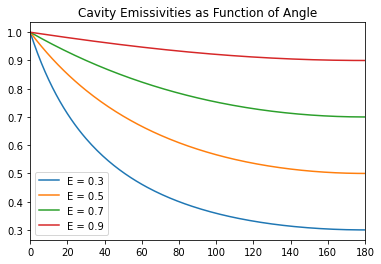

In [92]:
import matplotlib.pyplot as plt
angles = np.arange(181)*(np.pi/180)
sig = 5.67e-8 #Boltzmann
Tb = 1000.0 #arbitrary
qb = -sig*Tb**4 #BlackBody Flux

for E in [0.3,0.5,0.7,0.9]: #Different emissivities
    emissivity = np.array([])
    for angle in angles:
        a1 = 1
        a2 = 1
        a3 = 2*np.sin(angle/2)
        
        f11 = 0.0
        f12 = 1.0-np.sin(angle/2)
        f13 = 1.0-f12
        f21 = 1.0-np.sin(angle/2)
        f22 = 0.0
        f23 = 1.0-f21
        f31 = 0.5
        f32 = 0.5
        f33 = 0

        f = np.array([[f11, f12, f13], [f21, f22, f23], [f31, f32, f33]])
        T = np.array([Tb, Tb, 0.0])#must be float
        eps  = np.array([E, E, 1])
       
        qr = r.rad_encl_q(f,T,eps)#Goat code

        appE = qr[2]/qb
        emissivity = np.append(emissivity,[appE])

    plt.plot(angles*180/np.pi, emissivity)

plt.legend(["E = 0.3","E = 0.5","E = 0.7","E = 0.9"])
plt.title("Cavity Emissivities as Function of Angle")
plt.xlim([0,180])
plt.show()
